# Structure

- Introduction
- What is a trend
    - Additive
    - Multiplicative
- How to detect a trend
- How to remove a trend
    - For additive trends: difference
    - For multiplicative trends: log + difference
- Conclusions / Summary

---

# Introduction

# What is a trend

## Additive trends

$
Y(t)=Trend(t)+Seasonality(t)+Residual(t)
$

## Multiplicative trends

$
Y(t)=Trend(t)×Seasonality(t)×Residual(t)
$

# How to detect a trend

Okay, you are correct that `statsmodels.tsa.seasonal_decompose` requires you to specify the model type ('additive' or 'multiplicative'). It doesn't automatically determine this for you. The choice of whether the seasonal pattern is additive or multiplicative depends on how the magnitude (amplitude) of the seasonal fluctuations changes with the overall level of the time series.

Here are the common ways a user can check if a seasonal pattern is additive or multiplicative:

1.  **Visual Inspection of the Time Series Plot:**
    * **How to do it:** Plot your time series data over time.
    * **Interpretation:**
        * If the height of the seasonal peaks and the depth of the seasonal troughs (relative to the local trend) appear to be roughly constant throughout the series, an **additive** model is likely appropriate. The seasonal variation adds a fixed amount regardless of the series' level.
        * If the height of the seasonal peaks and the depth of the seasonal troughs increase as the overall level of the series increases, a **multiplicative** model is likely appropriate. The seasonal variation is a proportion of the series' level, so the absolute magnitude of the variation grows with the level. Conversely, if the variation decreases as the level decreases, it also suggests a multiplicative model.
    * **Example:** The Air Passengers dataset is a classic example where the seasonal swings clearly get larger as the number of passengers increases over time, indicating multiplicative seasonality.


<Axes: >

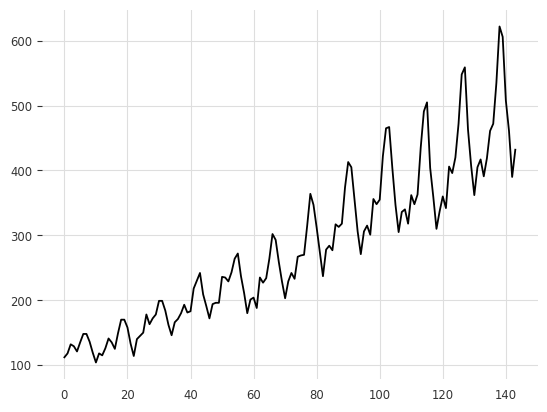

In [309]:
# Put examples here (the same from Hands-on example)

# CODE
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
# from statsmodels.tsa.tsatools import lagmat
import seaborn as sns
import matplotlib.pyplot as plt


flights = sns.load_dataset('flights')
month_map = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}
flights['month_str'] = flights['month'].map(month_map).astype(str)
flights['year_str'] = flights['year'].astype(str)
flights['date'] = flights['year_str'] + '-' + flights['month_str'] + '-01'
flights['date'] = pd.to_datetime(flights['date'])
# flights = flights[['date', 'passengers']]
flights['passengers'].plot()



In [296]:
from darts.datasets import MonthlyMilkDataset


data = MonthlyMilkDataset().load()
data = data.pd_dataframe()
data.reset_index(names=['date'], inplace=True)
data['year_str'] = data['date'].apply(lambda x: str(x).split('-')[0])
data

component,date,Pounds per cow,year_str
0,1962-01-01,589.0,1962
1,1962-02-01,561.0,1962
2,1962-03-01,640.0,1962
3,1962-04-01,656.0,1962
4,1962-05-01,727.0,1962
...,...,...,...
163,1975-08-01,858.0,1975
164,1975-09-01,817.0,1975
165,1975-10-01,827.0,1975
166,1975-11-01,797.0,1975



2.  **Plotting Seasonal Subseries:**
    * **How to do it:** Arrange and plot the data by season. For example, if you have monthly data, plot all the January values together, all the February values together, and so on, on separate mini-plots or overlaid with different colors/markers for each month.
    * **Interpretation:**
        * If the vertical spread (variance) of the data points within each seasonal subseries is similar across all seasons, it suggests **additive** seasonality.
        * If the vertical spread of the data points tends to be larger for seasons that typically have higher values and smaller for seasons with lower values, it suggests **multiplicative** seasonality.


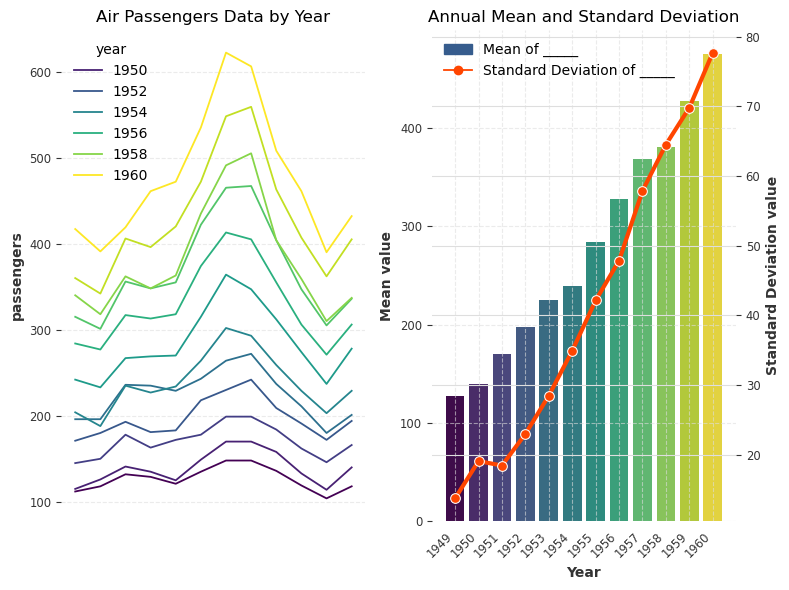

In [311]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle


flights['seq'] = flights.groupby('year').cumcount() + 1


fig, axes = plt.subplots(ncols=2, figsize=(8, 6))
sns.lineplot(flights, x='seq', y='passengers', hue='year', palette='viridis', ax=axes[0])


annual_summary = flights.groupby('year')['passengers'].agg(['mean', 'std']).reset_index()
annual_summary.rename(columns={'mean': 'mean_passengers', 'std': 'std_passengers'}, inplace=True)
g1 = sns.barplot(annual_summary, x='year', y='mean_passengers', hue='year', palette='viridis', ax=axes[1])

axes2 = axes[1].twinx()
x = flights['year'].nunique()
g2 = sns.lineplot(annual_summary, x=range(x), y='std_passengers', marker="o", color='orangered', ax=axes2, linewidth=3, markersize=7)
g1.set_ylabel('Mean value')
g2.set_ylabel('Standard Deviation value')
g1.legend(handles=[
    Rectangle((0,0), 0, 0, color=sns.color_palette(palette='viridis', n_colors=None, desat=None, as_cmap=False)[1], label='Mean of _____'),
    Line2D([], [], marker='o', color='orangered', label='Standard Deviation of _____')
])


for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, linestyle='--', alpha=0.6)

axes[0].set_title('Air Passengers Data by Year')
axes[0].set_xlabel('')
axes[0].set_xticks([])

axes[1].set_title('Annual Mean and Standard Deviation')
axes[1].set_xlabel('Year')

plt.tight_layout()


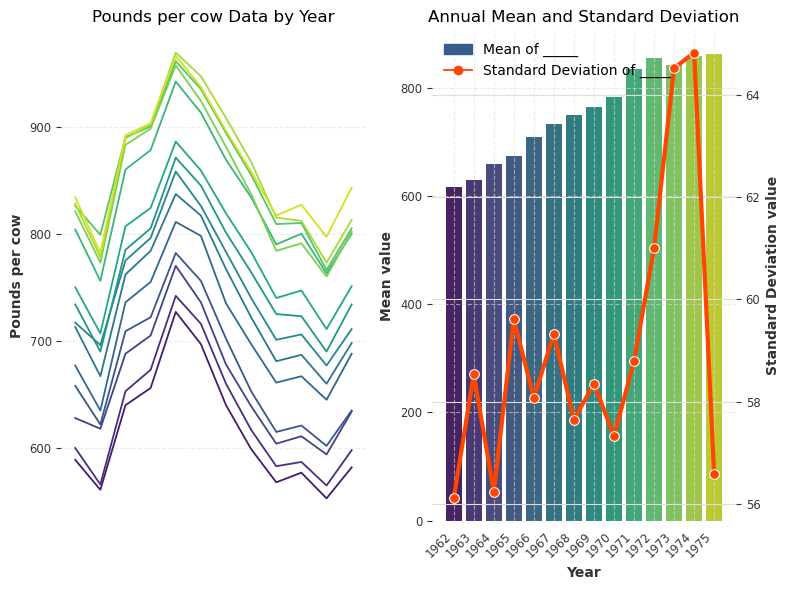

In [318]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle


data['seq'] = data.groupby('year_str').cumcount() + 1


fig, axes = plt.subplots(ncols=2, figsize=(8, 6))
g0 = sns.lineplot(data, x='seq', y='Pounds per cow', hue='year_str', palette='viridis', ax=axes[0])
# g0.legend(loc='upper left')
axes[0].get_legend().set_visible(False)

annual_summary = data.groupby('year_str')['Pounds per cow'].agg(['mean', 'std']).reset_index()
annual_summary.rename(columns={'mean': 'mean_Pounds per cow', 'std': 'std_Pounds per cow'}, inplace=True)
g1 = sns.barplot(annual_summary, x='year_str', y='mean_Pounds per cow', hue='year_str', palette='viridis', ax=axes[1])

axes2 = axes[1].twinx()
x = data['year_str'].nunique()
g2 = sns.lineplot(annual_summary, x=range(x), y='std_Pounds per cow', marker="o", color='orangered', ax=axes2, linewidth=3, markersize=7)
g1.set_ylabel('Mean value')
g2.set_ylabel('Standard Deviation value')
g1.legend(handles=[
    Rectangle((0,0), 0, 0, color=sns.color_palette(palette='viridis', n_colors=None, desat=None, as_cmap=False)[1], label='Mean of _____'),
    Line2D([], [], marker='o', color='orangered', label='Standard Deviation of _____')
])


for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, linestyle='--', alpha=0.6)

axes[0].set_title('Pounds per cow Data by Year')
axes[0].set_xlabel('')
axes[0].set_xticks([])

axes[1].set_title('Annual Mean and Standard Deviation')
axes[1].set_xlabel('Year')

plt.tight_layout()



3.  **Comparing Residuals from Both Models:**
    * **How to do it:** Perform the seasonal decomposition using both the 'additive' and 'multiplicative' models. Then, examine the residual component from each decomposition.
    * **Interpretation:**
        * The model (additive or multiplicative) whose residual component looks more like random noise (i.e., centered around zero, with constant variance and no discernible pattern, especially no remaining seasonal pattern) is likely the better fit.
        * If you use the additive model on data that is truly multiplicative, the residuals will often still show a seasonal pattern whose amplitude changes over time.
        * If you use the multiplicative model on data that is truly additive, the residuals might show some patterns, but the multiplicative model is generally more useful when the variance increases with the mean.
        * Ideally, the residuals should be stationary.


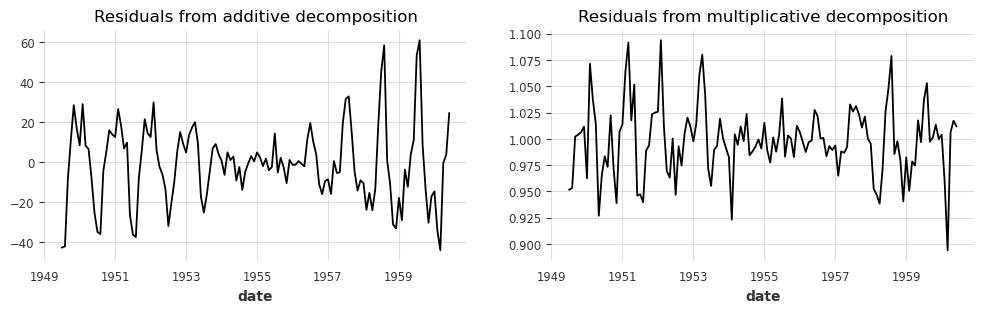

In [279]:
from statsmodels.tsa.seasonal import seasonal_decompose

prepared_flights = flights[['date', 'passengers']]
prepared_flights.set_index('date', inplace=True)

add_decomp = seasonal_decompose(prepared_flights, model='additive', filt=None, period=12, two_sided=True, extrapolate_trend=0)
mul_decomp = seasonal_decompose(prepared_flights, model='multiplicative', filt=None, period=12, two_sided=True, extrapolate_trend=0)


fig, axes = plt.subplots(ncols=2, figsize=(12,3))
add_decomp.resid.plot(ax=axes[0])
mul_decomp.resid.plot(ax=axes[1])

axes[0].set_title(f'Residuals from additive decomposition');
axes[1].set_title(f'Residuals from multiplicative decomposition');


In [280]:
# plot_acf(add_decomp.resid.dropna(), lags=20)
# plt.show()
# plot_acf(mul_decomp.resid.dropna(), lags=20)


In [ ]:

from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.regression.linear_model import OLS


def breusch_pagan_test(resid, trend):
    df = pd.DataFrame({'resid': resid, 'trend': trend}).dropna()
    X = add_constant(df['trend'])
    model = OLS(df['resid'], X).fit()
    test = het_breuschpagan(model.resid, model.model.exog)
    return test


foo = breusch_pagan_test(add_decomp.resid, add_decomp.trend)
bar = breusch_pagan_test(mul_decomp.resid, mul_decomp.trend)
pd.DataFrame([foo, bar], columns=['lm', 'lm_pvalue', 'fvalue', 'f_pvalue'], index=['Add. mode', 'Mult. mode'])

,lm,lm_pvalue,fvalue,f_pvalue
Add. mode,2.549309,0.110343,2.560127,0.112017
Mult. mode,1.214627,0.270418,1.207333,0.273892



4.  **Using a Logarithmic Transformation as a Diagnostic:**
    * **How to do it:** Apply a logarithmic transformation to your time series data (assuming all values are positive). Then, visually inspect the log-transformed series.
    * **Interpretation:** If the log-transformed series shows seasonal fluctuations with roughly constant amplitude, it's a strong indication that the original series had **multiplicative** seasonality. As we discussed, $\log(T \times S \times R) = \log(T) + \log(S) + \log(R)$. If the original seasonality was multiplicative, taking the log makes it additive on the log scale, thus stabilizing the variance and seasonal amplitude on that scale.



In practice, visual inspection and plotting seasonal subseries are often the first and most informative steps to determine the nature of the seasonality. If there's doubt, comparing the residuals from both decomposition models can help confirm the choice.

(35064, 28, 1)


time
2014-12-31 23:00:00    65.41
2015-01-01 00:00:00    64.92
2015-01-01 01:00:00    64.48
2015-01-01 02:00:00    59.32
2015-01-01 03:00:00    56.04
                       ...  
2018-12-31 18:00:00    77.02
2018-12-31 19:00:00    76.16
2018-12-31 20:00:00    74.30
2018-12-31 21:00:00    69.89
2018-12-31 22:00:00    69.88
Freq: h, Name: price actual, Length: 35064, dtype: float64

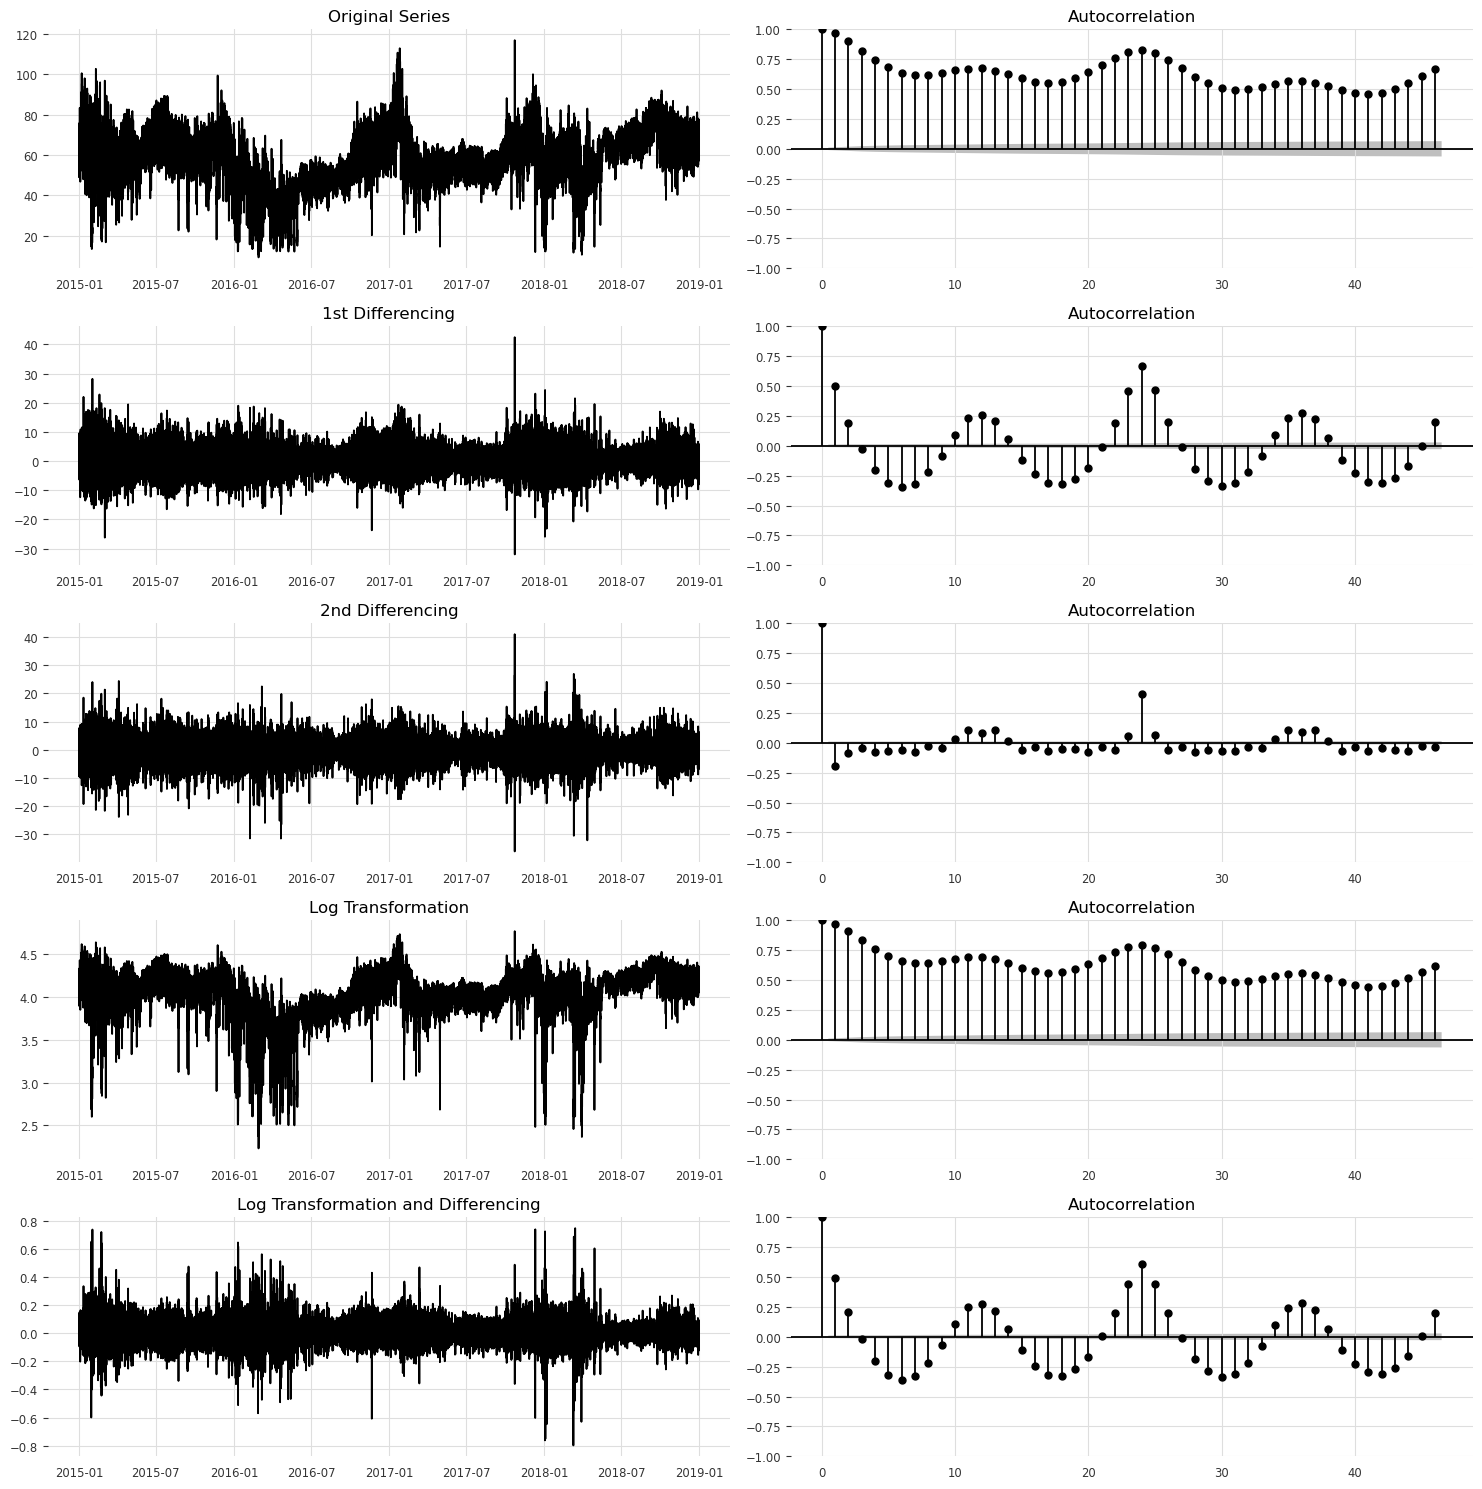

time
2014-12-31 23:00:00         NaN
2015-01-01 00:00:00   -0.007519
2015-01-01 01:00:00   -0.006801
2015-01-01 02:00:00   -0.083409
2015-01-01 03:00:00   -0.056881
                         ...   
2018-12-31 18:00:00   -0.007631
2018-12-31 19:00:00   -0.011229
2018-12-31 20:00:00   -0.024725
2018-12-31 21:00:00   -0.061188
2018-12-31 22:00:00   -0.000143
Freq: h, Name: price actual, Length: 35064, dtype: float64

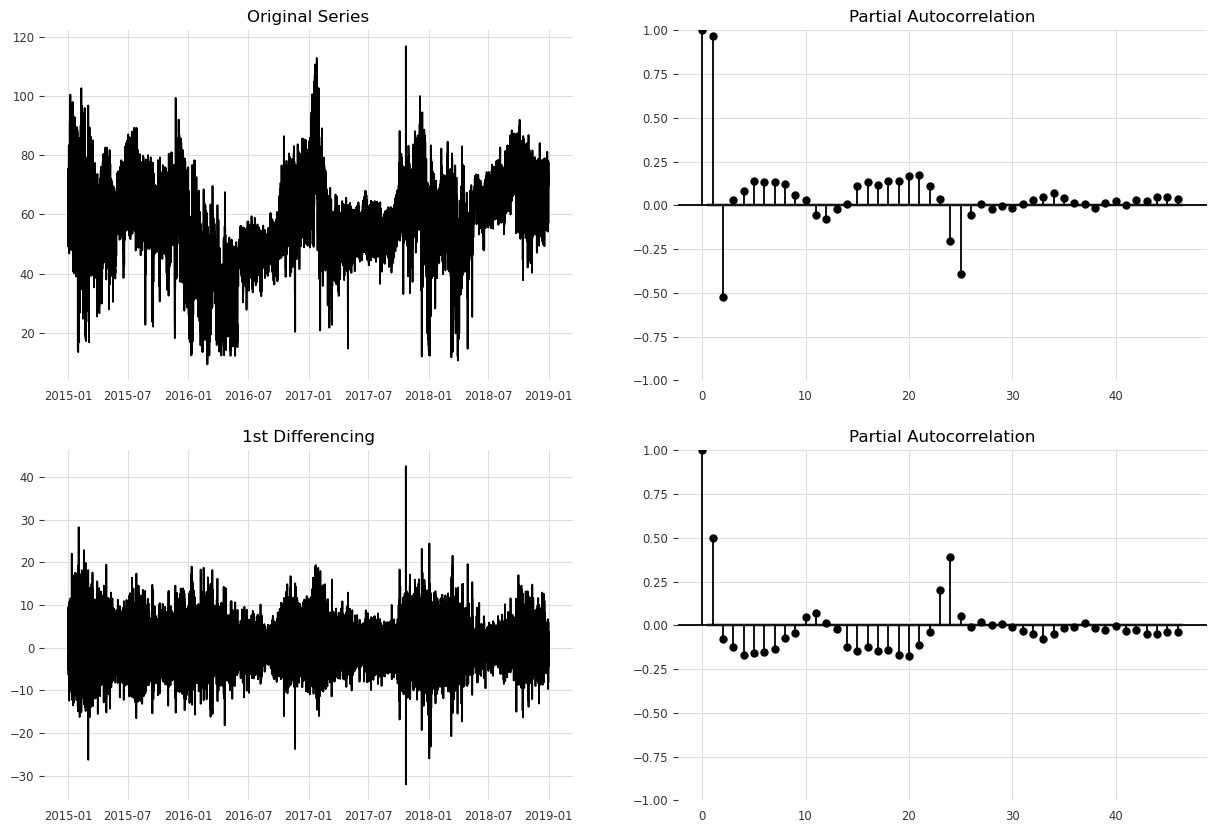

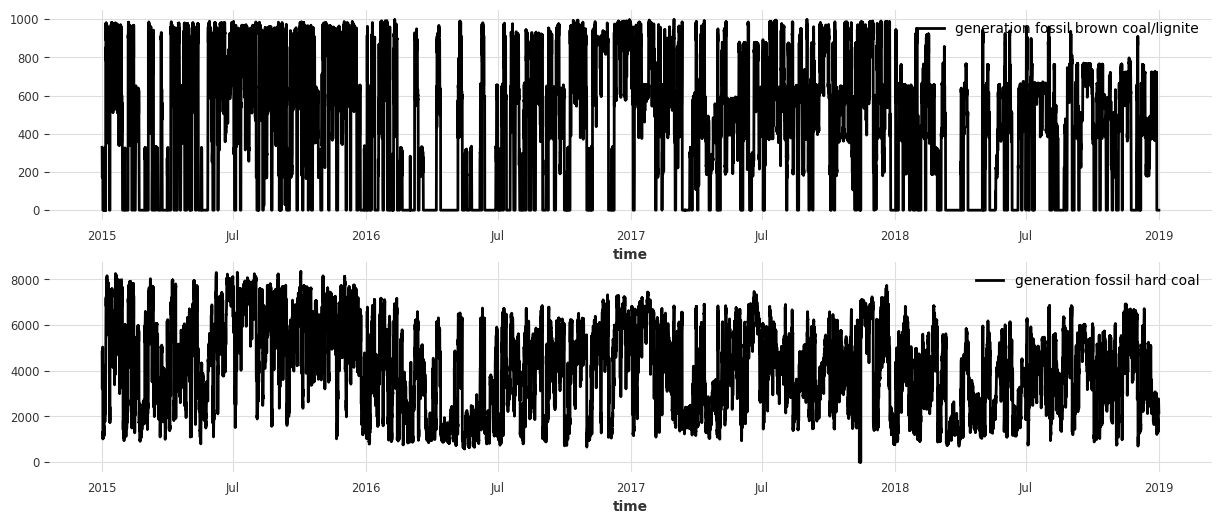

In [127]:



fig, axes = plt.subplots(nrows=2, figsize=(15,6))
energy['generation fossil brown coal/lignite'].plot(ax=axes[0])
energy['generation fossil hard coal'].plot(ax=axes[1])
plt.show()



In [128]:
print(energy['generation fossil brown coal/lignite'].shape)

energy['generation fossil brown coal/lignite'][:100].pd_series()

(35064, 1, 1)


time
2014-12-31 23:00:00    329.0
2015-01-01 00:00:00    328.0
2015-01-01 01:00:00    323.0
2015-01-01 02:00:00    254.0
2015-01-01 03:00:00    187.0
                       ...  
2015-01-04 22:00:00      0.0
2015-01-04 23:00:00    326.0
2015-01-05 00:00:00    104.0
2015-01-05 01:00:00      0.0
2015-01-05 02:00:00      NaN
Freq: h, Name: generation fossil brown coal/lignite, Length: 100, dtype: float64

(True, 121)


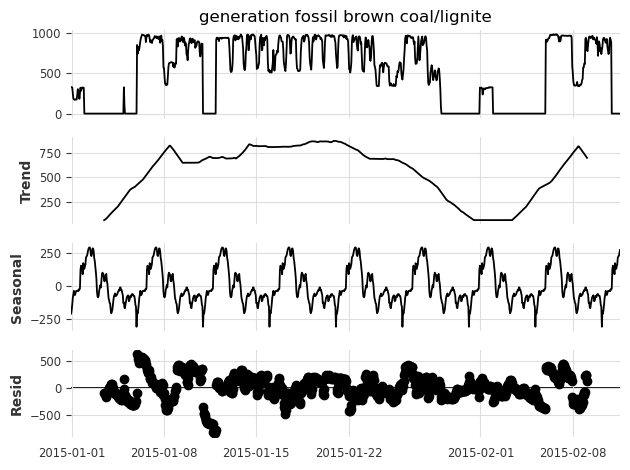

In [137]:
foo = fill_missing_values(energy['generation fossil brown coal/lignite'])

print(check_seasonality(foo, m=None, max_lag=500, alpha=0.05))
res_add = seasonal_decompose(foo[:1000].pd_series(), model='add', period=121)
res_add.plot();
# res_mul = seasonal_decompose(foo[:1000].pd_series(), model='mul', period=96)
# res_mul.plot();

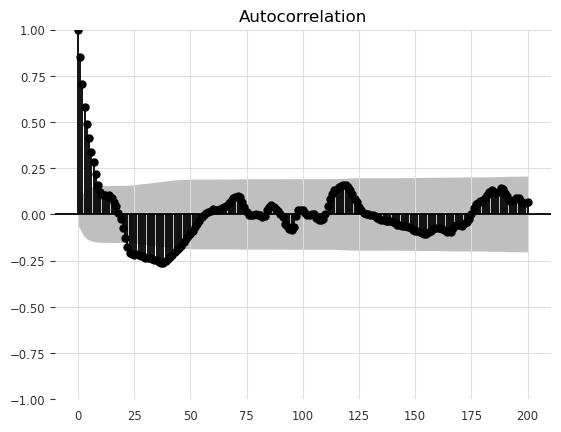

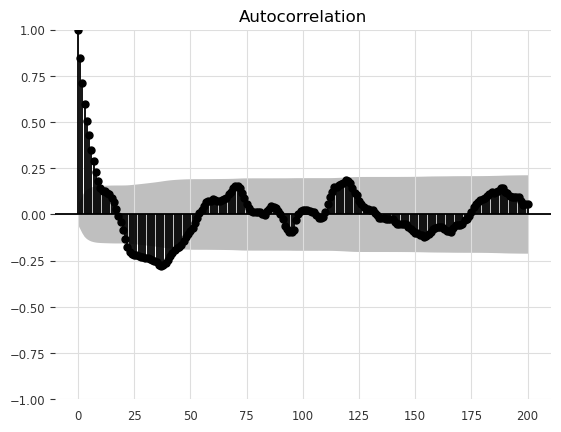

In [120]:
from statsmodels.graphics.tsaplots import plot_acf

# res_add.resid.dropna()
plot_acf(res_add.resid.dropna(), lags=200);
plot_acf(res_mul.resid.dropna(), lags=200);


(True, 24)


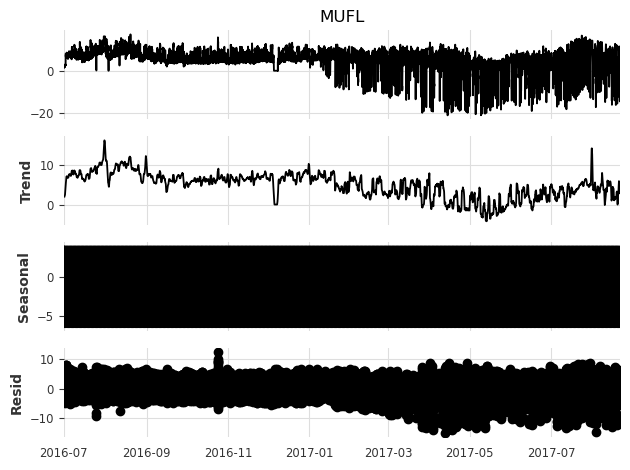

In [92]:

print(check_seasonality(etth1['MUFL'], m=None, max_lag=100, alpha=0.05))
res_add = seasonal_decompose(etth1['MUFL'][:10000].pd_series(), model='add')
res_add.plot();
# res_mul = seasonal_decompose(etth1['MUFL'][:1000].pd_series(), model='mul')
# res_mul.plot();

# How to remove a trend


In [209]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the sine wave and trends
n_points = 350
frequency = 0.05
amplitude = 10.0
x = np.arange(n_points)
# additive_trend = 0.1 * x
# multiplicative_trend = 1 + 0.05 * x

additive_trend = 0.1 * x
multiplicative_trend = 0.02 * x

signal = amplitude * np.sin(2 * np.pi * frequency * x) + 12
signal_additive_trend = signal + additive_trend
signal_multiplicative_trend = signal * multiplicative_trend
signal_both_trends = (signal * multiplicative_trend) + additive_trend

additive_trend = 0.1 * x

signal_additive_trend = signal + additive_trend

names = ['Signal + Trend', 'Signal $\\times$ Trend']
signals = [signal_additive_trend, signal_multiplicative_trend]



In [210]:

def adf_test(data_df):
    test_stat, p_val = [], []
    cv_1pct, cv_5pct, cv_10pct = [], [], []
    for c in data_df.columns: 
        adf_res = adfuller(data_df[c].dropna())
        test_stat.append(adf_res[0])
        p_val.append(adf_res[1])
        cv_1pct.append(adf_res[4]['1%'])
        cv_5pct.append(adf_res[4]['5%'])
        cv_10pct.append(adf_res[4]['10%'])
    new_index = [f'{col} (ADF)' for col in data_df.columns]
    adf_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct}, 
                             index=new_index) #data_df.columns
    adf_res_df = adf_res_df.round(4)
    # adf_res_df.index = [f'{adf_res_df.index.values[0]} (ADF)']
    return adf_res_df


def kpss_test(data_df):
    test_stat, p_val = [], []
    cv_1pct, cv_2p5pct, cv_5pct, cv_10pct = [], [], [], []
    for c in data_df.columns:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            kpss_res = kpss(data_df[c].dropna(), regression='ct')
        test_stat.append(kpss_res[0])
        p_val.append(kpss_res[1])
        cv_1pct.append(kpss_res[3]['1%'])
        cv_2p5pct.append(kpss_res[3]['2.5%'])
        cv_5pct.append(kpss_res[3]['5%'])
        cv_10pct.append(kpss_res[3]['10%'])
    new_index = [f'{col} (KPSS)' for col in data_df.columns]
    kpss_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                            #    'Critical value - 2.5%': cv_2p5pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct}, 
                             index=new_index)
    kpss_res_df = kpss_res_df.round(4)
    # kpss_res_df.index = [f'{kpss_res_df.index.values[0]} (KPSS)']
    return kpss_res_df


def perform_stationary_tests(data_df):
    data = data_df.replace([np.inf, -np.inf], np.nan).dropna()
    adf_df = adf_test(data)
    kpss_df = kpss_test(data)
    test_df = pd.concat([adf_df, kpss_df], axis=0)
    test_df.sort_index(inplace=True)
    return test_df



## Removing additive trends

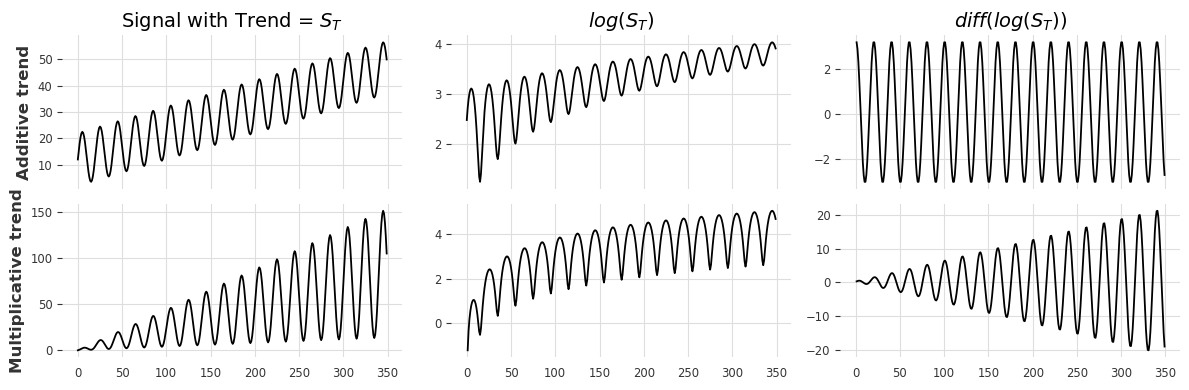

In [211]:

signal_dfs = []
for signal, name in zip(signals, names):
    _df = pd.DataFrame(signal, columns=[name])
    _df[f'log({name})'] = np.log(_df[name])
    _df[f'diff1({name})'] = _df[f'{name}'].diff(1)
    signal_dfs.append(_df)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 4), sharex=True, squeeze=False)
for i, df, name in zip(range(2), signal_dfs, names):
    x = df.reset_index()['index']
    axes[i][0].plot(df[name])
    axes[i][1].plot(df[f'log({name})'])
    axes[i][2].plot(df[f'diff1({name})'])

axes[0][0].set_title('Signal with Trend = $S_T$', fontsize=14)
axes[0][1].set_title('$log(S_T)$', fontsize=14)
axes[0][2].set_title('$diff(log(S_T))$', fontsize=14)
axes[0][0].set_ylabel('Additive trend', fontsize=12)
axes[1][0].set_ylabel('Multiplicative trend', fontsize=12)

for ax in axes.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:

display(perform_stationary_tests(signal_dfs[0]))
display(perform_stationary_tests(signal_dfs[1]))


,Test statistic,p-value,Critical value - 1%,Critical value - 5%,Critical value - 10%
Signal + Trend (ADF),1.135000e-01,0.967,-3.4498,-2.8701,-2.5713
Signal + Trend (KPSS),1.310000e-02,0.100,0.2160,0.1460,0.1190
diff1(Signal + Trend) (ADF),-5.757864e+13,0.000,-3.4493,-2.8699,-2.5712
diff1(Signal + Trend) (KPSS),8.300000e-03,0.100,0.2160,0.1460,0.1190
log(Signal + Trend) (ADF),-5.341200e+00,0.000,-3.4503,-2.8703,-2.5714
log(Signal + Trend) (KPSS),9.200000e-02,0.100,0.2160,0.1460,0.1190


,Test statistic,p-value,Critical value - 1%,Critical value - 5%,Critical value - 10%
Signal $\times$ Trend (ADF),-2.231000e-01,0.9357,-3.4495,-2.8700,-2.5713
Signal $\times$ Trend (KPSS),1.400000e-02,0.1000,0.2160,0.1460,0.1190
diff1(Signal $\times$ Trend) (ADF),-2.180458e+10,0.0000,-3.4494,-2.8700,-2.5713
diff1(Signal $\times$ Trend) (KPSS),8.700000e-03,0.1000,0.2160,0.1460,0.1190
log(Signal $\times$ Trend) (ADF),-9.265400e+00,0.0000,-3.4503,-2.8703,-2.5714
log(Signal $\times$ Trend) (KPSS),2.523000e-01,0.0100,0.2160,0.1460,0.1190


## Removing multiplicative trends

c:\Users\douglas.sgrott_indic\miniconda3\envs\tsfresh_venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


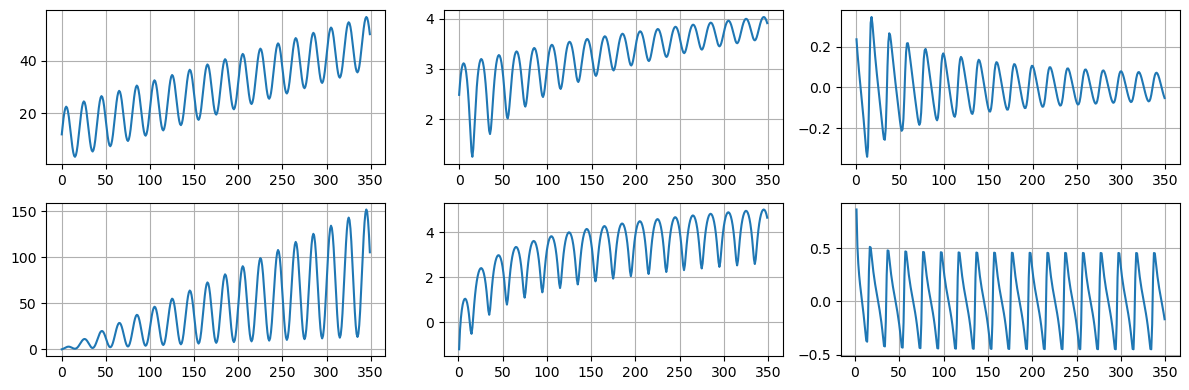

In [95]:

signal_dfs = []
for signal, name in zip(signals, names):
    _df = pd.DataFrame(signal, columns=[name])
    _df[f'log({name})'] = np.log(_df[name])
    _df[f'diff1(log({name}))'] = _df[f'log({name})'].diff(1)
    signal_dfs.append(_df)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 4), squeeze=False)
for i, df, name in zip(range(2), signal_dfs, names):
    x = df.reset_index()['index']
    axes[i][0].plot(df[name])
    axes[i][1].plot(df[f'log({name})'])
    axes[i][2].plot(df[f'diff1(log({name}))'])


for ax in axes.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:

# foo = signal_dfs[0][signal_dfs[0].columns[0]].replace([np.inf, -np.inf], np.nan).dropna().to_frame()
# display(adf_test(foo))
# display(kpss_test(foo))
# perform_stationary_tests(signal_dfs[0])

display(perform_stationary_tests(signal_dfs[0]))
display(perform_stationary_tests(signal_dfs[1]))


,Test statistic,p-value,Critical value - 1%,Critical value - 5%,Critical value - 10%
Signal + Trend (ADF),0.1135,0.9670,-3.4498,-2.8701,-2.5713
Signal + Trend (KPSS),0.0131,0.1000,0.2160,0.1460,0.1190
diff1(log(Signal + Trend)) (ADF),-2.9806,0.0367,-3.4503,-2.8703,-2.5714
diff1(log(Signal + Trend)) (KPSS),0.0086,0.1000,0.2160,0.1460,0.1190
log(Signal + Trend) (ADF),-5.3412,0.0000,-3.4503,-2.8703,-2.5714
log(Signal + Trend) (KPSS),0.0920,0.1000,0.2160,0.1460,0.1190


,Test statistic,p-value,Critical value - 1%,Critical value - 5%,Critical value - 10%
Signal $\times$ Trend (ADF),-0.1010,0.9493,-3.4496,-2.8700,-2.5713
Signal $\times$ Trend (KPSS),0.0140,0.1000,0.2160,0.1460,0.1190
diff1(log(Signal $\times$ Trend)) (ADF),-12.3231,0.0000,-3.4503,-2.8703,-2.5715
diff1(log(Signal $\times$ Trend)) (KPSS),0.0185,0.1000,0.2160,0.1460,0.1190
log(Signal $\times$ Trend) (ADF),-12.2867,0.0000,-3.4503,-2.8703,-2.5714
log(Signal $\times$ Trend) (KPSS),0.2371,0.0100,0.2160,0.1460,0.1190


# Hands-on example

# Conclusion

Okay, let's interpret the results of the ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin) tests for each of the six signals. These tests help us determine if a time series is stationary.

Remember the hypotheses for each test (at a standard significance level of 0.05):

* **ADF Test:**
    * Null Hypothesis ($H_0$): The time series is non-stationary (has a unit root).
    * Alternative Hypothesis ($H_1$): The time series is stationary.
    * Interpretation: If the p-value is less than 0.05, we reject $H_0$ and conclude the series is likely stationary.

* **KPSS Test:**
    * Null Hypothesis ($H_0$): The time series is stationary.
    * Alternative Hypothesis ($H_1$): The time series is non-stationary.
    * Interpretation: If the p-value is less than 0.05, we reject $H_0$ and conclude the series is likely non-stationary.

Using both tests provides a more robust assessment:

* ADF rejects $H_0$ and KPSS fails to reject $H_0$: Series is likely stationary.
* ADF fails to reject $H_0$ and KPSS rejects $H_0$: Series is likely non-stationary.
* Both reject $H_0$: Series is likely non-stationary (often implies difference stationarity).
* Both fail to reject $H_0$: Series is likely stationary.

Here are the interpretations for each signal:

**Signal 1:**
* **ADF Test:** p-value (0.981) > 0.05. Fail to reject $H_0$. (Suggests non-stationarity)
* **KPSS Test:** p-value (0.01) < 0.05. Reject $H_0$. (Suggests non-stationarity)
* **Interpretation:** Both tests indicate non-stationarity. **Signal 1 is likely non-stationary.**

**Signal 2:**
* **ADF Test:** p-value (5.9e-07) < 0.05. Reject $H_0$. (Suggests stationarity)
* **KPSS Test:** p-value (0.01) < 0.05. Reject $H_0$. (Suggests non-stationarity)
* **Interpretation:** The tests contradict. ADF suggests stationarity, while KPSS strongly suggests non-stationarity. This pattern (ADF rejects $H_0$, KPSS rejects $H_0$) often occurs with time series that are **difference stationary**. However, for practical purposes before modeling with methods assuming strict stationarity, you would treat this as non-stationary and likely apply differencing. **Signal 2 is likely non-stationary, possibly difference stationary.**

**Signal 3:**
* **ADF Test:** p-value (0.037) < 0.05. Reject $H_0$. (Suggests stationarity)
* **KPSS Test:** p-value (0.1) > 0.05. Fail to reject $H_0$. (Suggests stationarity)
* **Interpretation:** Both tests indicate stationarity. **Signal 3 is likely stationary.**

**Signal 4:**
* **ADF Test:** p-value (0.951) > 0.05. Fail to reject $H_0$. (Suggests non-stationarity)
* **KPSS Test:** p-value (0.01) < 0.05. Reject $H_0$. (Suggests non-stationarity)
* **Interpretation:** Both tests indicate non-stationarity. **Signal 4 is likely non-stationary.**

**Signal 5:**
* **ADF Test:** p-value (1.37e-15) < 0.05. Reject $H_0$. (Suggests stationarity)
* **KPSS Test:** p-value (0.01) < 0.05. Reject $H_0$. (Suggests non-stationarity)
* **Interpretation:** Similar to Signal 2, the tests contradict. This pattern suggests **difference stationarity**. You would likely treat this as non-stationary for modeling purposes requiring strict stationarity. **Signal 5 is likely non-stationary, possibly difference stationary.**

**Signal 6:**
* **ADF Test:** p-value (6.68e-23) < 0.05. Reject $H_0$. (Suggests stationarity)
* **KPSS Test:** p-value (0.1) > 0.05. Fail to reject $H_0$. (Suggests stationarity)
* **Interpretation:** Both tests indicate stationarity. **Signal 6 is likely stationary.**

In summary, based on these test results at a 0.05 significance level:
* **Signal 3 and Signal 6 appear to be stationary.**
* **Signal 1, Signal 4 are likely non-stationary.**
* **Signal 2 and Signal 5 are likely non-stationary (possibly difference stationary), requiring transformation like differencing to achieve stationarity before applying models that assume stationarity.**

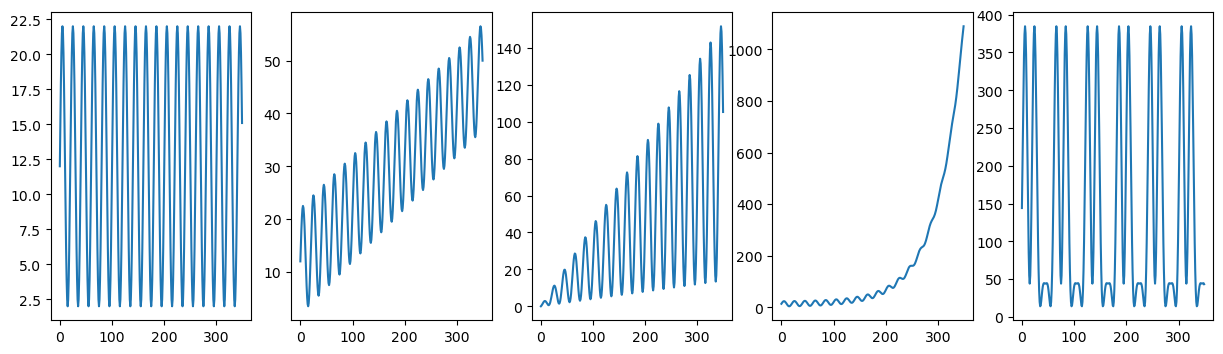

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the sine wave and trends
n_points = 350
frequency = 0.05
amplitude = 10.0
x = np.arange(n_points)

additive_trend = 0.1 * x
multiplicative_trend = 0.02 * x

signal = amplitude * np.sin(2 * np.pi * frequency * x) + 12
signal2 = amplitude * np.sin(2 * np.pi * frequency/3 * x) + 12

signal_additive_trend = signal + additive_trend
signal_multiplicative_trend = signal * multiplicative_trend

signal_additive_trend_exp = signal + np.exp(0.2*additive_trend)
signal_multiplicative_trend_exp = signal * signal2 #np.exp(0.5*multiplicative_trend)

names = ['Signal + Trend', 'Signal $\\times$ Trend']
signals = [signal, signal_additive_trend, signal_multiplicative_trend, signal_additive_trend_exp, signal_multiplicative_trend_exp]


fig, axes = plt.subplots(ncols=len(signals), figsize=(15, 4))

for ax, signal in zip(axes.flatten(), signals):
    ax.plot(signal)

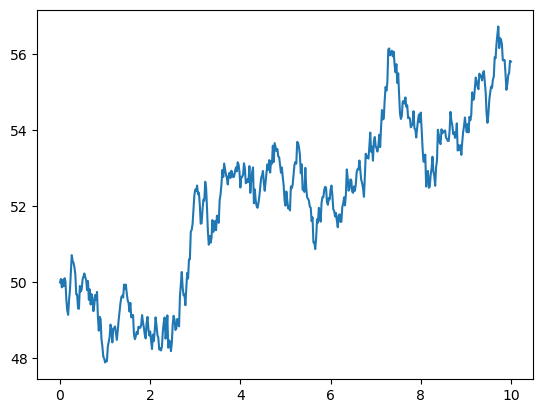

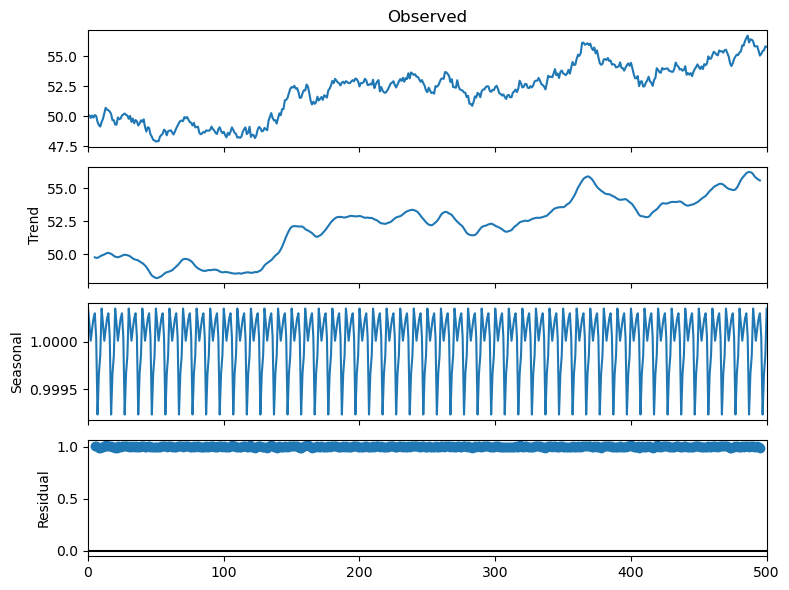

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose


from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 1
# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# period = 60
t = np.linspace(0.0, N*dt, N+1)
plt.plot(t, x[0])

# decomp_viz = seasonal_decompose(signals[4], period=period, model='add')
decomp_viz = seasonal_decompose(x[0], period=10, model='mul')
fig = decomp_viz.plot()
fig.set_size_inches((8, 6))
# Tight layout to realign things
fig.tight_layout()
plt.show()

# decomp_viz = seasonal_decompose(signals[4], period=period, model='mul')
# fig = decomp_viz.plot()
# fig.set_size_inches((16, 9))
# # Tight layout to realign things
# fig.tight_layout()
# plt.show()

# EXPORT!

In [ ]:
import seaborn as sb
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

x = ['1.1','1.2','1.2.1','2.0','2.1(beta)']
y = [1000,2000,500,8000,3000]
y1 = [3,4,1,8,5]
g = sb.barplot(x=x, y=y, color='blue')
g2 = sb.lineplot(x=range(len(x)), y=y1, color='orange', marker='o', ax=g.axes.twinx())
g.set_xticklabels(g.get_xticklabels(), rotation=-30)
g.set_xlabel('EngineVersion')
g.set_ylabel('Counts')
g2.set_ylabel('Detections rate')
g.legend(handles=[Rectangle((0,0), 0, 0, color='blue', label='Nontouch device counts'), Line2D([], [], marker='o', color='orange', label='Detections rate for nontouch devices')], loc=(1.1,0.8))

That's an excellent observation and gets to a critical point about using classical time series decomposition methods like `seasonal_decompose`.

You are absolutely right: `seasonal_decompose` and similar traditional decomposition techniques operate under assumptions that might not always hold.

1.  **Assumption of Components:** These methods assume that the time series can be reasonably represented as a combination of distinct trend, seasonal, and residual components (either additively or multiplicatively).
2.  **Assumption of Known Seasonality Period:** They require you to specify the length of the seasonal cycle (`period` or `m`).
3.  **Assumption of Relatively Stable Patterns:** They work best when the trend and seasonal patterns are relatively consistent throughout the series (or at least within the moving window used for estimation).

**What happens when Assumptions are Violated (e.g., Brownian Motion)?**

The image you provided beautifully illustrates this. Brownian motion (or a random walk) is a non-stationary process that theoretically has no deterministic trend and no seasonality – it's essentially just accumulated random steps.

When you apply `seasonal_decompose` to such a series:

* **Trend:** It will fit *a* trend. In the case of a random walk, the "trend" component will simply reflect the path of the random walk itself, as there's no underlying systematic linear or exponential movement for the method to isolate. It's essentially capturing the non-stationarity.
* **Seasonal:** It will *try* to find a pattern repeating at the `period` you specified. Since no such pattern exists, the seasonal component it extracts will likely be close to zero (in additive decomposition) or one (in multiplicative decomposition) if the randomness doesn't align consistently with the period, or it might capture some spurious, non-meaningful cycles due to random chance. In your image, the flat "Seasonal" component at 1.0 is a strong indicator that no meaningful multiplicative seasonality was found at the assumed period.
* **Residual:** This component gets everything that wasn't assigned to the trend or the forced seasonal component. If the original series didn't fit the decomposition model well, the residuals will not look like random noise. They will contain the "real" underlying process that the decomposition failed to model. In your Brownian motion example, the "Residual" plot still shows structure, which is the random walk minus the slightly smoothed version assigned to the "Trend".

Essentially, the function *forces* the data into the Trend + Seasonality + Residual structure, even if that structure doesn't genuinely exist. The output components are then artifacts of the method rather than true underlying drivers of the data.

**How can we know if the outputs of an arbitrary usage of `seasonal_decompose` makes sense?**

The key is to critically evaluate the output components:

1.  **Examine the Residuals:** This is the most important step. The residuals should ideally be random, uncorrelated noise with constant variance (homoscedastic).
    * **Plot the Residuals:** Look for any patterns (e.g., remaining trends, cycles, changes in variance like fanning out/in). If you see patterns, the decomposition is likely inappropriate or incomplete.
    * **Check Autocorrelation of Residuals:** Plot the ACF and PACF of the residual series. Significant spikes (especially outside the confidence intervals) indicate that there is remaining autocorrelation, meaning the residuals are not random and contain unmodeled information.
    * **Check Residual Variance:** Visually assess if the variance of the residuals is constant across the entire series.
2.  **Examine the Components:**
    * Does the extracted **Trend** component look like a reasonable long-term movement of the series?
    * Does the extracted **Seasonal** component look like a consistent, repeating pattern at the specified period? Does its amplitude behave according to the chosen mode (constant for additive, scaling for multiplicative)? If the seasonal plot is flat or just noisy, it's a sign that no clear seasonality was detected at that period.
3.  **Compare Additive vs. Multiplicative (if applicable):** If you are unsure about the `model` (additive/multiplicative), perform both decompositions and compare the residual plots. The one with more random, constant-variance residuals is generally preferred.

If the residuals show significant patterns or autocorrelation, or if the extracted components look nonsensical given the raw data, the decomposition result should not be trusted as a true representation of the series' components.

**What can we do to alleviate these misinterpretations before using it?**

1.  **Perform Thorough Preliminary Visual Analysis:** Always start by plotting the original time series. Look for visual evidence of a trend (linear, curved) and repeating seasonal patterns (constant or increasing/decreasing amplitude).
2.  **Check for Seasonality Presence Statistically:** Use ACF plots to confirm if there are significant autocorrelations at lags corresponding to potential seasonal periods *before* assuming seasonality exists and applying decomposition.
3.  **Check for Stationarity:** Random walks like Brownian motion are non-stationary. While decomposition aims to separate stationary residuals, applying it directly to highly non-stationary data without a clear trend/seasonality structure can be misleading. Consider stationarity tests (like the Augmented Dickey-Fuller test) if you suspect complex non-stationarity.
4.  **Understand Your Data's Generating Process (if possible):** If you know how the data was generated, you might have clues about whether a trend or seasonality should even be expected. Financial prices, for example, are often modeled as random walks where classical decomposition isn't appropriate for forecasting.

**When should we NOT use `seasonal_decompose`?**

You should be cautious about or avoid using classical `seasonal_decompose` when:

* **There is no clear visual evidence of a trend or seasonality** in the raw data.
* **You suspect the seasonal period is irregular** or changes over time. `seasonal_decompose` requires a fixed period.
* **The relationship between components is likely more complex** than simple addition or multiplication.
* **The time series is very short** relative to the seasonal period, making seasonal pattern estimation unreliable.
* **The data has significant outliers or structural breaks** that can distort the moving average calculations used in classical decomposition.
* **You are working with irregular time series** (data points not equally spaced in time). `seasonal_decompose` typically assumes a fixed frequency.
* **More sophisticated models are available and appropriate** that handle trend and seasonality differently (e.g., ARIMA models which use differencing, state space models, or many of the machine learning models in Darts which can learn these patterns without explicit decomposition).

In summary, classical decomposition is a great exploratory tool for understanding series with clear, stable additive or multiplicative patterns. But it forces a structure onto the data. Always validate its output by examining the residuals and considering whether the extracted components align with the actual behavior of the time series. If not, explore alternative analysis or modeling approaches.

The observation that multiplicative residuals are usually centered around 1 and not "much bigger than 1" is correct, and understanding *why* is key to analyzing them effectively.

**Understanding the Nature of Residuals:**

* **Additive Residuals:** These represent the **absolute error** or **deviation** after accounting for trend and seasonality. They are typically centered around **0**. For example, if the model predicts 100, and the actual is 105, the additive residual is +5.
* **Multiplicative Residuals:** These represent a **factor** by which the observed value deviates from the trend-seasonal prediction. They are typically centered around **1**. For example, if the model predicts 100, and the actual is 105, the multiplicative residual is 1.05 (105/100). If the actual was 95, the residual would be 0.95 (95/100).

The "not much bigger than 1" behavior of multiplicative residuals is inherent to their definition as factors. It's not about their absolute range, but about their *spread* or *variance* relative to 1.

**How to Analyze Residuals (Qualitatively and Quantitatively):**

The goal of a good decomposition (regardless of additive or multiplicative) is that the residuals should ideally be **white noise**: random, uncorrelated, and with constant variance.

### 1. Qualitative Analysis (Visual Inspection)

Always plot the residuals from both additive and multiplicative decompositions and compare them side-by-side.

* **Randomness / Lack of Pattern:**
    * Look for any remaining trends, cycles, or seasonal patterns. If the residuals still show a clear pattern, the chosen decomposition mode (or the decomposition itself) is likely inadequate. They should look like pure "noise."
* **Constant Variance (Homoscedasticity):** This is the **most crucial visual indicator** for choosing between additive and multiplicative modes.
    * **For Additive Mode:** If the additive decomposition is appropriate, its residuals should have a relatively constant vertical spread (variance) across the entire time series. You shouldn't see them "fanning out" (increasing variance) or "fanning in" (decreasing variance) as the trend changes.
    * **For Multiplicative Mode:** If the multiplicative decomposition is appropriate, its residuals (which are factors centered around 1) should also have a relatively constant vertical spread (variance) around the value of 1.
    * **The Key Comparison:** If your original series showed increasing variance with increasing trend (e.g., larger seasonal swings when the series level is high), then a *correct* multiplicative decomposition should result in residuals with constant variance. If you used an *additive* decomposition on such a series, its residuals would *fan out*. Conversely, if the original series had constant variance, an *additive* decomposition would work well, but a multiplicative one might yield residuals that *fan in* or show other patterns because it's incorrectly trying to scale a constant variance.

### 2. Quantitative Analysis

1.  **Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots:**
    * **Primary Quantitative Test:** This is arguably the most important quantitative check. For both additive and multiplicative residuals, plot their ACF and PACF.
    * **Ideal Residuals:** The ACF and PACF plots for ideal white noise residuals should show **no significant spikes** (i.e., all spikes should fall within the confidence intervals, usually indicated by blue shaded areas) at any lag.
    * **Interpretation:** If one decomposition mode yields residuals with significantly fewer or no significant autocorrelations compared to the other, that mode has done a better job of extracting the underlying patterns, leaving behind truly random noise.

2.  **Variance/Standard Deviation of Residuals:**
    * While you want constant variance *qualitatively*, you can also compute the variance (or standard deviation) of the residuals for both models.
    * **The main goal is *homoscedasticity***. For additive residuals, you want the variance to be constant across different segments of the time series. For multiplicative residuals, you also want the variance (of the *factors* around 1) to be constant across segments.
    * You might not compare the absolute values of the variances directly (since they represent different things – absolute error vs. factor deviation). Instead, focus on **segmenting the series** (e.g., into quartiles based on the trend value) and computing the residual variance for each segment. The decomposition mode that results in the most similar variances across these segments is often the better choice.
    * **Formal Tests for Heteroscedasticity:** For a more rigorous check, you could apply statistical tests for heteroscedasticity (e.g., Breusch-Pagan test, White test) to the residuals. If a test fails to reject the null hypothesis of homoscedasticity, it supports that mode.

**In summary:**

When analyzing residuals to choose between additive and multiplicative decomposition:

* **Visually**, prioritize the **constant variance** of the residuals.
* **Quantitatively**, prioritize the **absence of significant autocorrelation** in the residuals (using ACF/PACF plots).
* Remember that multiplicative residuals being "not much bigger than 1" is expected. The focus is on their *spread* around 1.

By combining these qualitative and quantitative approaches, you can make an informed decision about which decomposition mode best describes your time series.

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings("ignore")


def plot_decomp_and_resid(decomp, resid, model):
    fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=False)

    axs[0].set_title(f'{model.capitalize()} Residuals')
    axs[0].plot(resid, label='Residuals', color='grey')
    axs[0].axhline(0 if model == 'additive' else 1, color='red', linestyle='--')

    # Fix qcut labels for boxplot
    trend = decomp.trend.dropna()
    labels = pd.qcut(trend, 4)
    label_strings = labels.astype(str)
    sns.boxplot(x=label_strings, y=resid.loc[labels.index], ax=axs[1])
    axs[1].set_title("Residual Spread by Trend Quartile")
    axs[1].tick_params(axis='x', rotation=45)

    plot_acf(resid.reset_index(drop=True), ax=axs[2])
    axs[2].set_title("ACF of Residuals")

    plt.tight_layout()
    plt.show()

    # def decompose(ts, model):
    #     return seasonal_decompose(ts, model=model, period=period)

def calculate_variance_score(resid, trend):
    def segment_variance_check(resid, trend):
        df = pd.DataFrame({'resid': resid, 'trend': trend}).dropna()
        df['segment'] = pd.qcut(df['trend'], 4, labels=False)
        variances = df.groupby('segment')['resid'].var()
        return variances

    return np.std(segment_variance_check(resid, trend)) / np.mean(segment_variance_check(resid, trend))


def breusch_pagan_test(resid, trend):
    df = pd.DataFrame({'resid': resid, 'trend': trend}).dropna()
    X = add_constant(df['trend'])
    model = OLS(df['resid'], X).fit()
    test = het_breuschpagan(model.resid, model.model.exog)
    return test[1]  # p-value


def check_decomposition_mode(ts, period, plot=True):
    models = ['additive', 'multiplicative']
    results = {}

    for model in models:
        try:
            decomp = seasonal_decompose(ts, model=model, period=period)
            resid, trend = decomp.resid, decomp.trend

            variance_score = calculate_variance_score(resid, trend)
            bp_pval = breusch_pagan_test(resid, trend)

            # Calculate autocorrelation score: simple ACF lags sum
            acf_vals = acf(resid.dropna(), nlags=20, fft=True)
            acf_score = np.sum(np.abs(acf_vals[1:21]))  # Skip lag 0 (always 1.0)

            results[model] = {
                'decomp': decomp,
                'variance_score': variance_score,
                'bp_pval': bp_pval,
                'acf_score': acf_score
            }

            if plot:
                plot_decomp_and_resid(decomp, resid.dropna(), model)
        except Exception as e:
            print(f"Could not decompose with {model}: {e}")
            continue

    if not results:
        print("No valid decomposition was performed.")
        return None, None

    scores = {model: results[model]['variance_score'] + results[model]['acf_score'] - results[model]['bp_pval']
              for model in results}
    best_model = min(scores, key=scores.get)

    print("Suggested decomposition mode based on residual quality:", best_model.upper())
    for model in results:
        print(f"  {model.capitalize()} -> Variance score: {results[model]['variance_score']:.3f}, "
              f"ACF score: {results[model]['acf_score']:.2f}, "
              f"Breusch-Pagan p-value: {results[model]['bp_pval']:.3f}")

    return best_model, results


from darts.datasets import MonthlyMilkDataset


data = MonthlyMilkDataset().load()
data = data.pd_series()

# data = flights.copy()
# data = data['passengers']

# data = signal_dfs[1]['Signal $\\times$ Trend'][1:]

# data = signal_dfs[0]['Signal + Trend']#[1:]

# Run mode detection
mode, results = check_decomposition_mode(data, period=12, plot=False)
# results


Suggested decomposition mode based on residual quality: ADDITIVE
  Additive -> Variance score: 0.382, ACF score: 2.93, Breusch-Pagan p-value: 0.632
  Multiplicative -> Variance score: 0.511, ACF score: 5.06, Breusch-Pagan p-value: 0.015


In [267]:
# signal_dfs[0]#['Signal $\\times$ Trend']


from darts.datasets import MonthlyMilkDataset

monthly_milk = MonthlyMilkDataset().load()
monthly_milk.pd_series()

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Freq: MS, Name: Pounds per cow, Length: 168, dtype: float64

In [ ]:
# In residual analysis, we want residuals to be uncorrelated — meaning each residual should be independent of the past (i.e., white noise).

# Lower ACF score is better. It means there's less autocorrelation in the residuals → better decomposition.

# A high score means the decomposition failed to remove all structure, and the residuals are not purely random.




# 🔹 2. Breusch–Pagan p-value – Heteroscedasticity Test
# ✅ What is the Breusch-Pagan Test?
# It tests for heteroscedasticity, or non-constant variance in residuals.

# For valid residuals, we expect homoscedasticity: the spread of residuals should be roughly constant over time or trend.

# ✅ What does the p-value mean?
# Null Hypothesis (H₀): Residuals have constant variance (homoscedastic).

# Alternative (H₁): Residual variance depends on the trend (heteroscedastic).

# ✅ Interpretation:
# p-value	Meaning	What you want
# > 0.05	Fail to reject H₀ → likely homoscedastic → good	✅
# < 0.05	Reject H₀ → likely heteroscedastic → residual variance depends on trend	❌

In [ ]:
from darts.datasets import EnergyDataset
from darts.utils.statistics import check_seasonality
from darts.utils.missing_values import fill_missing_values

energy = EnergyDataset().load()
print(energy.shape)

# -------------------------------------------------------

energy['price actual'].pd_series()

# -------------------------------------------------------

# dir(energy)
# energy.components
# energy['price actual']

series = energy['price actual'].pd_series()

fig, axes = plt.subplots(5,2, figsize = (15,15))

axes[0,0].plot(series)
axes[0,0].set_title('Original Series')
plot_acf(series.dropna(), ax=axes[0,1]);

axes[1,0].plot(series.diff())
axes[1,0].set_title('1st Differencing')
plot_acf(series.diff().dropna(), ax=axes[1,1]);

axes[2,0].plot(series.diff().diff())
axes[2,0].set_title('2nd Differencing')
plot_acf(series.diff().diff().dropna(), ax=axes[2,1]);

axes[3,0].plot(np.log(series))
axes[3,0].set_title('Log Transformation')
plot_acf(np.log(series).dropna(), ax=axes[3,1]);

axes[4,0].plot((np.log(series)).diff())
axes[4,0].set_title('Log Transformation and Differencing')
plot_acf((np.log(series)).diff().dropna(), ax=axes[4,1]);

plt.tight_layout()

# -------------------------------------------------------

# Plotting PACF graph with the 1st Differenced values of the column
fig, axes = plt.subplots(2,2, figsize = (15,10))

axes[0,0].plot(series)
axes[0,0].set_title('Original Series')
plot_pacf(series.dropna(), ax = axes[0,1]);

axes[1,0].plot(series.diff())
axes[1,0].set_title('1st Differencing')
plot_pacf(series.diff().dropna(), ax = axes[1,1]);